<a href="https://colab.research.google.com/github/velavalururajithasai/ml_dl/blob/master/EXERCISE_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing MNIST dataset
from keras.datasets import mnist
# The np_utils module provides utilities for converting data types and manipulating arrays.
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#load_data : unpacks the data into tuples : (X_train, y_train) and (X_test, y_test)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train[1].shape)

(28, 28)


In [ ]:
#shape : helps to view the dimensions of the numpy array
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


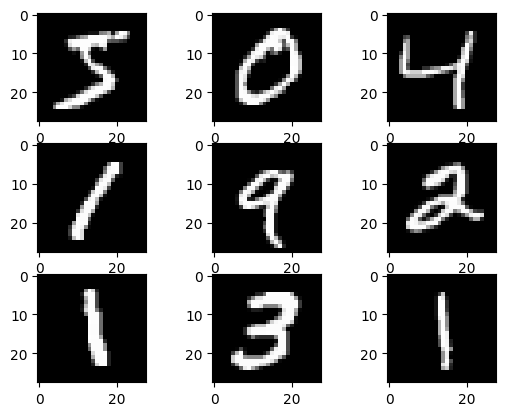

In [ ]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
#convert 2d to 1d
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [ ]:
#shape : helps to view the dimensions of the input array
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
#pixel values are typically represented as integers between 0 and 255,
#where 0 represents black and 255 represents white.
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
#Preprocessing
print("Class label of first image :", y_train[0])

Class label of first image : 5


In [ ]:
#One-hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Building a model
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
#input_dim : number of features(columns) in the input data
#output_dim : there are 10 possible output classes, corresponding to the digits 0 to 9.
input_dim = X_train.shape[1] #784
output_dim = 10 #0-9

In [ ]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fitting the model
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.3068 - accuracy: 0.6840 - val_loss: 0.8204 - val_accuracy: 0.8318
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7213 - accuracy: 0.8386 - val_loss: 0.6111 - val_accuracy: 0.8598
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5894 - accuracy: 0.8579 - val_loss: 0.5280 - val_accuracy: 0.8717
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5268 - accuracy: 0.8681 - val_loss: 0.4817 - val_accuracy: 0.8810
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4888 - accuracy: 0.8743 - val_loss: 0.4517 - val_accuracy: 0.8850
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4627 - accuracy: 0.8795 - val_loss: 0.4300 - val_accuracy: 0.8884
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4434 - accuracy: 0.8827 - val_loss: 0.4139 - val_accuracy: 0.8921
Epoch 

In [ ]:
#evaluates the trained neural network model on the testing data (X_test and Y_test)
#prints the test score and accuracy
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.33601775765419006
Test accuracy: 0.9075999855995178


313/313 [==============================] - 0s 764us/step
[5.7762669e-04 6.7186596e-07 1.8641404e-04 1.1306373e-01 6.0779828e-04
 8.1124794e-01 2.1880247e-04 5.7456755e-06 7.3698588e-02 3.9268125e-04]
5


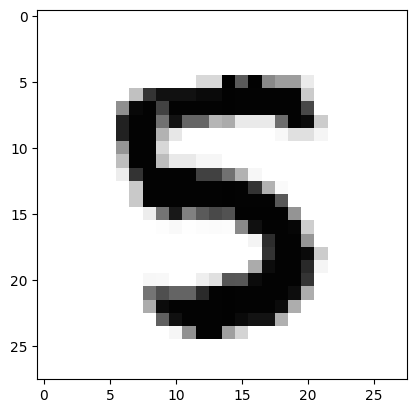

In [ ]:
image_index = 120
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [ ]:
#constants for readability
NB_EPOCHS = 20
BATCH_SIZE = 128

In [ ]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#MLP+Sigmoid+ADAM optimizer
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.5510 - accuracy: 0.8566 - val_loss: 0.2501 - val_accuracy: 0.9257
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2223 - accuracy: 0.9347 - val_loss: 0.1800 - val_accuracy: 0.9451
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1632 - accuracy: 0.9520 - val_loss: 0.1483 - val_accuracy: 0.9560
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1268 - accuracy: 0.9625 - val_loss: 0.1199 - val_accuracy: 0.9628
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0991 - accuracy: 0.9711 - val_loss: 0.1009 - val_accuracy: 0.9687
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0792 - accuracy: 0.9764 - val_loss: 0.0911 - val_accuracy: 0.9703
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 0.0885 - val_accuracy: 0.9717
Epoch 

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.33601775765419006
Test accuracy: 0.9075999855995178


313/313 [==============================] - 1s 2ms/step
[1.2054645e-11 6.2363070e-09 2.5475003e-10 9.9999994e-01 6.2264943e-11
 2.1129290e-08 4.1141762e-14 4.0354173e-10 1.3764165e-10 1.1309996e-08]
3


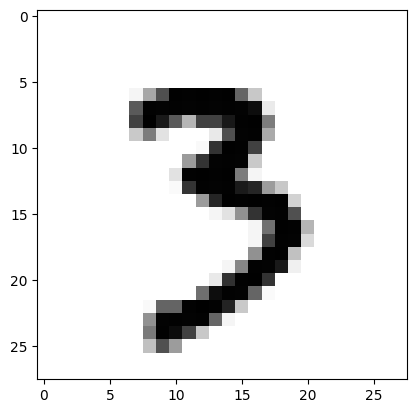

In [ ]:
image_index = 30
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [ ]:
#MLP+ReLu Activation+ADAM optimizer
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0705 - val_accuracy: 0.9818
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.0844 - val_accuracy: 0.9795
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0772 - val_accuracy: 0.9815
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0723 - val_accuracy: 0.9829
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 8.1142e-04 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9824
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 6.9904e-04 - accuracy: 0.9999 - val_loss: 0.0774 - val_accuracy: 0.9819
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0882 - val_accuracy: 0.980

In [ ]:
ReLu_score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', ReLu_score[0])
print('Test accuracy:', ReLu_score[1])

Test score: 2.3515279293060303
Test accuracy: 0.07400000095367432


313/313 [==============================] - 0s 2ms/step
[0.13501737 0.0869736  0.07961759 0.09403247 0.07798436 0.10595161
 0.08134513 0.0633026  0.14681223 0.12896301]
8


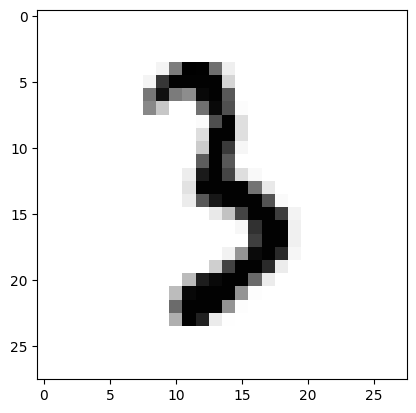

In [ ]:
image_index = 44
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_relu.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

model_batch = Sequential()
model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='sigmoid'))
model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 470,922
Trainable params: 469,898
Non-trainable params: 1,024
_________________________________________________________________


In [ ]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model_batch.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.3259 - accuracy: 0.9103 - val_loss: 0.2414 - val_accuracy: 0.9345
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1858 - accuracy: 0.9463 - val_loss: 0.1655 - val_accuracy: 0.9501
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1297 - accuracy: 0.9626 - val_loss: 0.1229 - val_accuracy: 0.9641
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0941 - accuracy: 0.9727 - val_loss: 0.0941 - val_accuracy: 0.9705
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0687 - accuracy: 0.9803 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0507 - accuracy: 0.9856 - val_loss: 0.0725 - val_accuracy: 0.9766
Epoch 7/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0367 - accuracy: 0.9903 - val_loss: 0.0755 - val_accuracy: 0.9763
Ep

In [ ]:
batch_score = model_sigmoid.evaluate(X_test, Y_test, verbose=0)
print('Test score:', batch_score[0])
print('Test accuracy:', batch_score[1])

Test score: 0.08344224840402603
Test accuracy: 0.9836000204086304


313/313 [==============================] - 1s 2ms/step
[2.26699600e-13 1.32109506e-08 1.24937083e-09 9.99999821e-01
 1.46743520e-11 1.14762038e-07 5.00247223e-14 2.76130063e-10
 3.04122595e-11 7.10376341e-11]
3


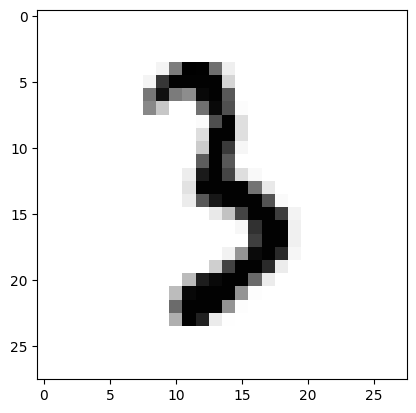

In [ ]:
image_index = 44
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))